<b> It has more features and not enough data, Linear Regression without regularization should suffer from curse of dimensionality as there are many categorical variables as well and OneHotEncoding is something that we will be doing</b>

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('display.max_columns',82)

train = pd.read_csv('house_price.csv')

print(train.shape,'\n')

train.head()

(1460, 81) 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


MISSING VALUE ANALYSIS

In [4]:
## Remove variables with too many NA's:

def remove_vars_with_many_nas(df):
    
    nas = df.isnull().sum()/len(df) > 0.3
    
    drop_cols = nas[nas==True].index.tolist()
    
    df.drop(columns=drop_cols, inplace=True)
    
remove_vars_with_many_nas(train)  

In [5]:
## Imputing missing values:

def impute_nas(df):
    
    remaining_nas = df.isna().sum() > 0
    
    remaining_nas = remaining_nas[remaining_nas == True].index.tolist()
    
    for i in remaining_nas:
        
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            
            df.loc[df[i].isnull(),i] = np.round(df[i].mean(),0)
            
        elif df[i].dtype == 'O':
            
            df.loc[df[i].isnull(),i] = df[i].mode()[0]
            
        else:
            pass
        
    if train.isna().sum().any() == False:
        
        print('Done!')    
        
impute_nas(train)

Done!


EDA (Exploratory Data Analysis)

Histogram of : MSSubClass


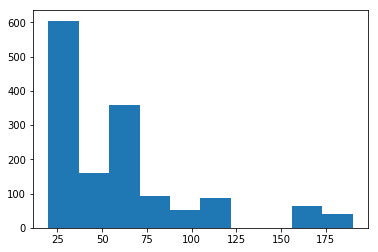

Bar graph of : MSZoning


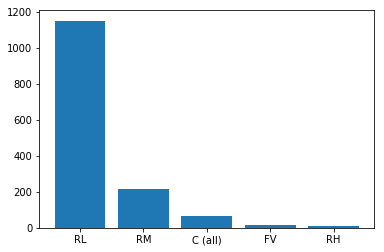

Histogram of : LotFrontage


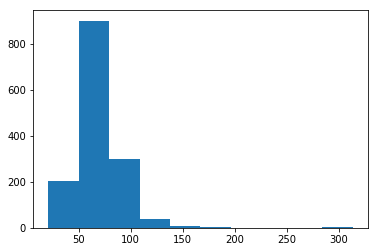

Histogram of : LotArea


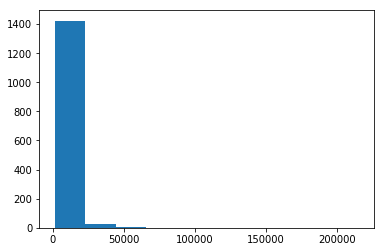

Bar graph of : Street


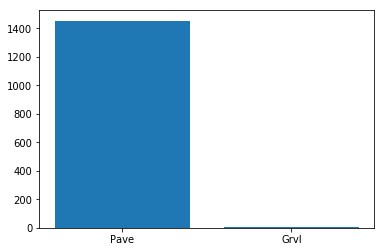

Bar graph of : LotShape


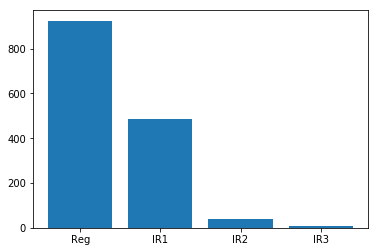

Bar graph of : LandContour


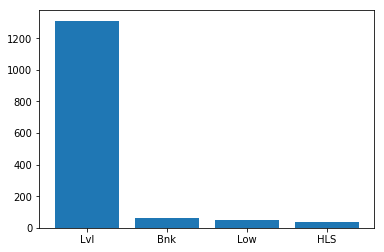

Bar graph of : Utilities


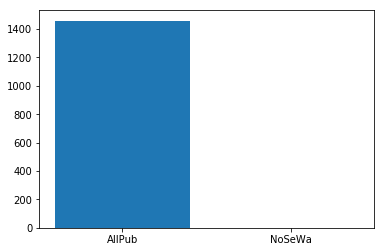

Bar graph of : LotConfig


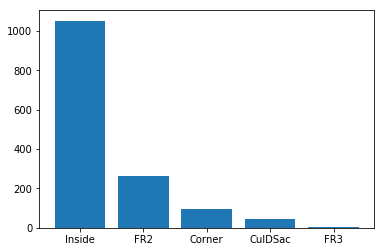

Bar graph of : LandSlope


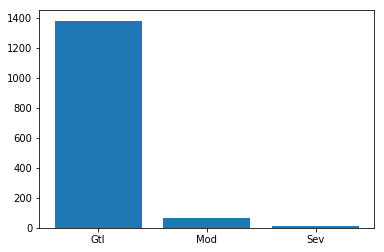

Bar graph of : Neighborhood


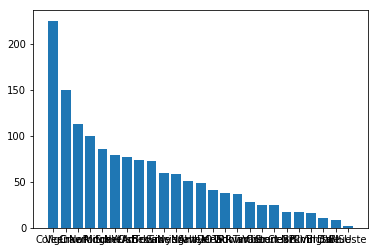

Bar graph of : Condition1


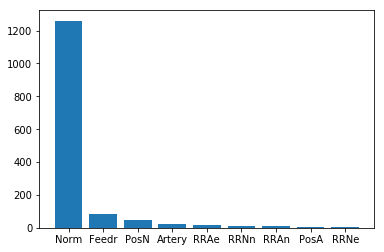

Bar graph of : Condition2


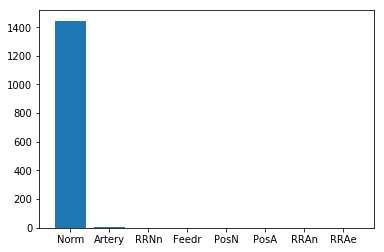

Bar graph of : BldgType


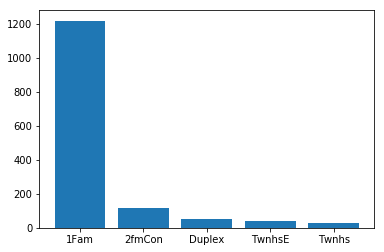

Bar graph of : HouseStyle


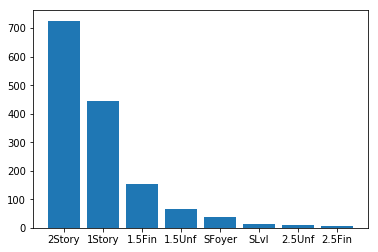

Histogram of : OverallQual


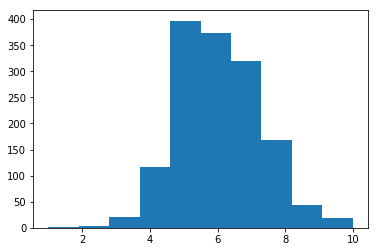

Histogram of : OverallCond


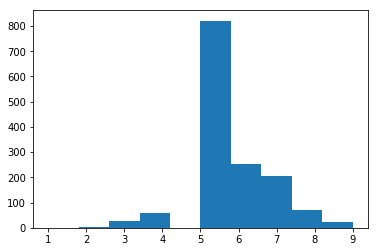

Histogram of : YearBuilt


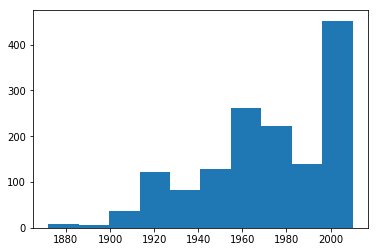

Histogram of : YearRemodAdd


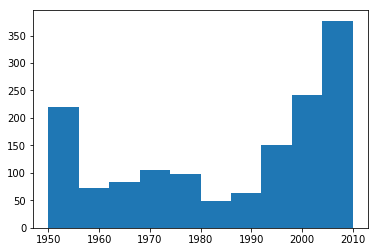

Bar graph of : RoofStyle


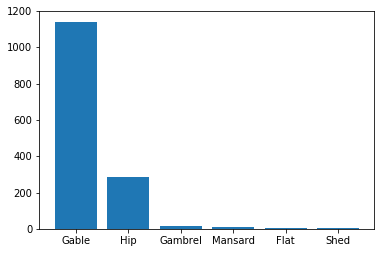

Bar graph of : RoofMatl


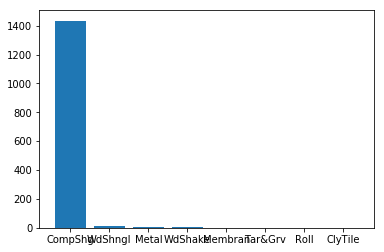

Bar graph of : Exterior1st


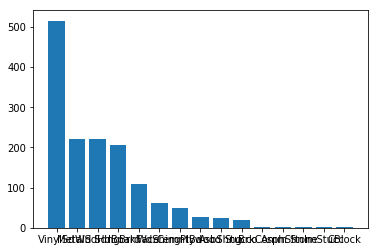

Bar graph of : Exterior2nd


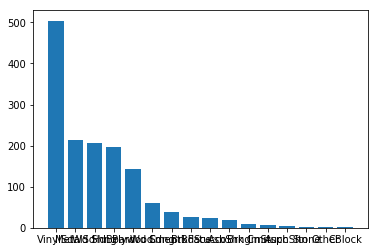

Bar graph of : MasVnrType


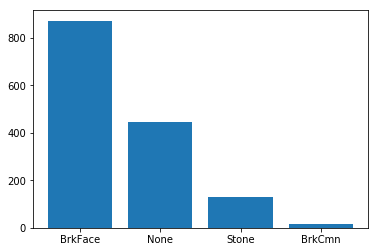

Histogram of : MasVnrArea


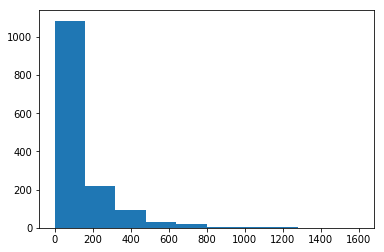

Bar graph of : ExterQual


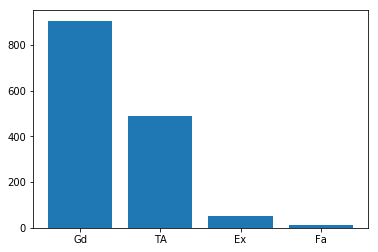

Bar graph of : ExterCond


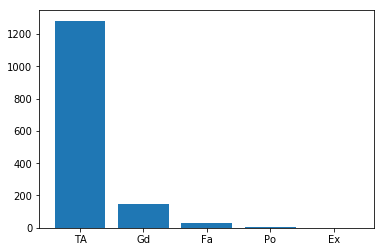

Bar graph of : Foundation


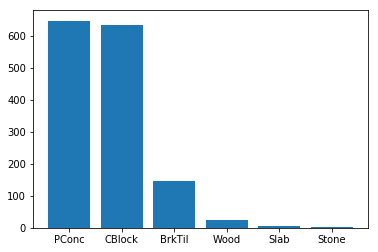

Bar graph of : BsmtQual


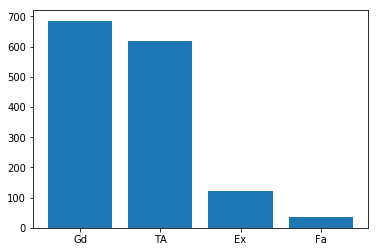

Bar graph of : BsmtCond


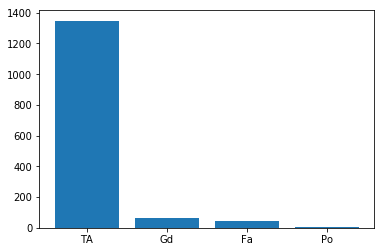

Bar graph of : BsmtExposure


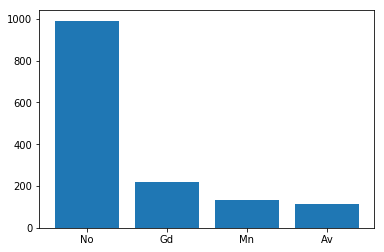

Bar graph of : BsmtFinType1


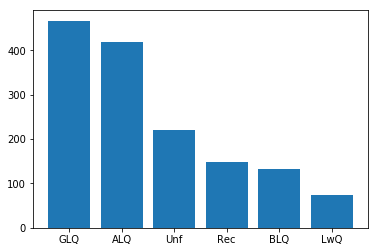

Histogram of : BsmtFinSF1


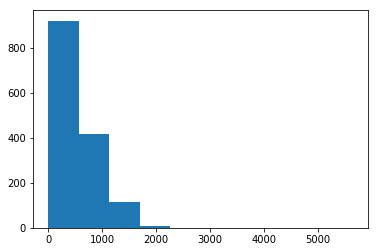

Bar graph of : BsmtFinType2


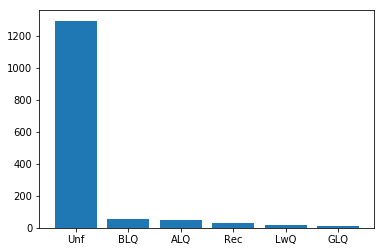

Histogram of : BsmtFinSF2


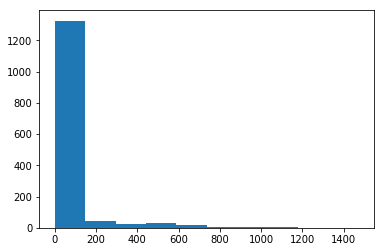

Histogram of : BsmtUnfSF


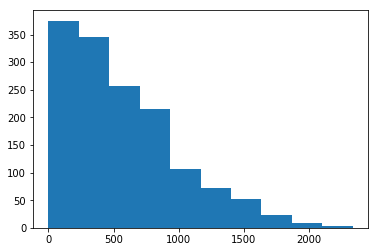

Histogram of : TotalBsmtSF


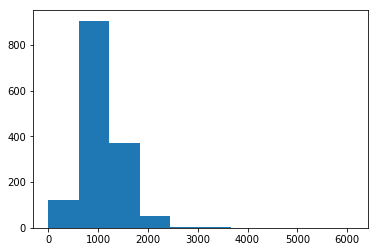

Bar graph of : Heating


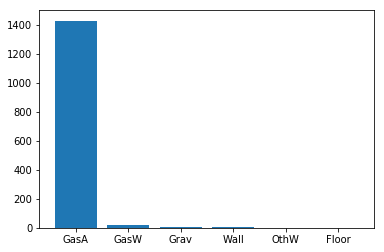

Bar graph of : HeatingQC


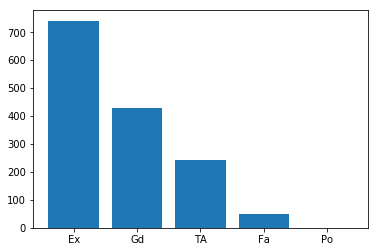

Bar graph of : CentralAir


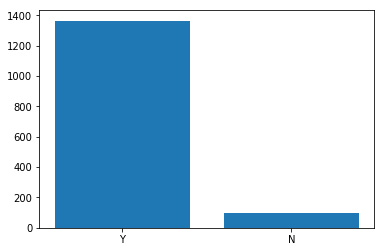

Bar graph of : Electrical


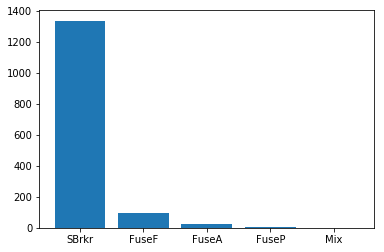

Histogram of : 1stFlrSF


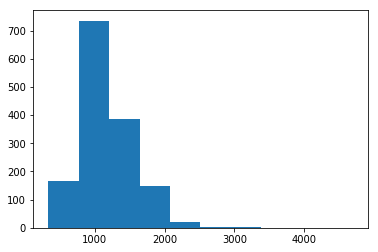

Histogram of : 2ndFlrSF


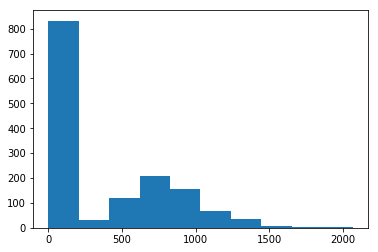

Histogram of : LowQualFinSF


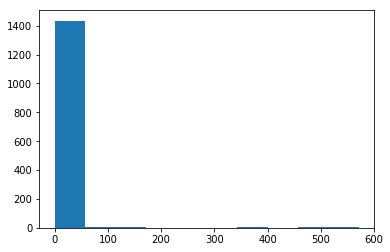

Histogram of : GrLivArea


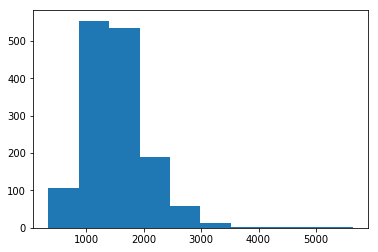

Histogram of : BsmtFullBath


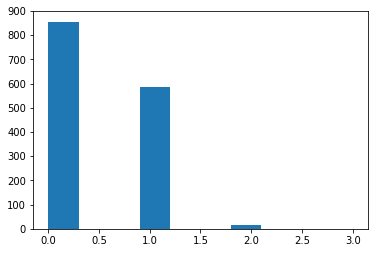

Histogram of : BsmtHalfBath


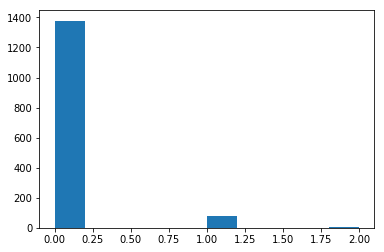

Histogram of : FullBath


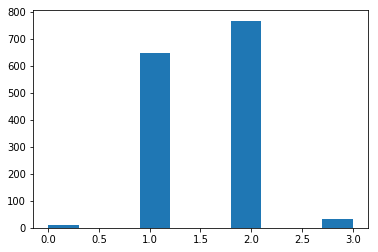

Histogram of : HalfBath


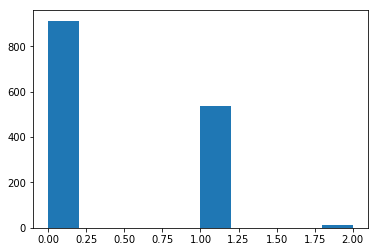

Histogram of : BedroomAbvGr


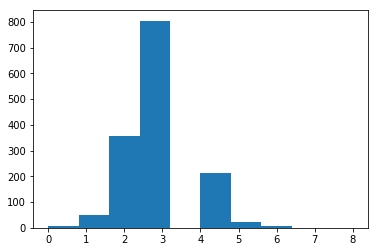

Histogram of : KitchenAbvGr


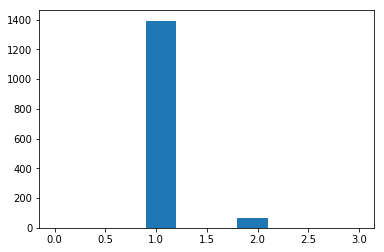

Bar graph of : KitchenQual


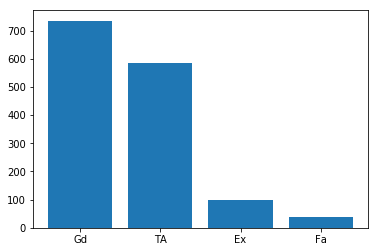

Histogram of : TotRmsAbvGrd


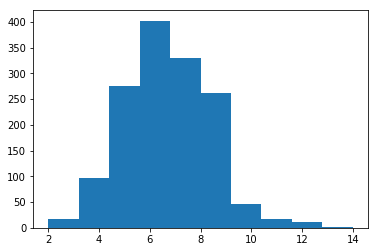

Bar graph of : Functional


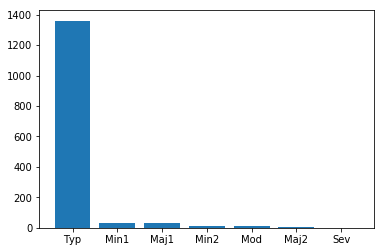

Histogram of : Fireplaces


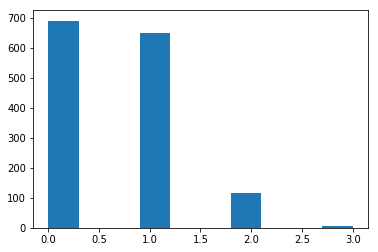

Bar graph of : GarageType


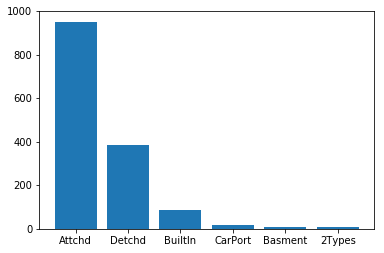

Histogram of : GarageYrBlt


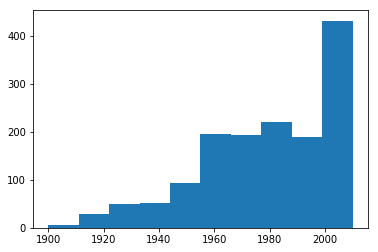

Bar graph of : GarageFinish


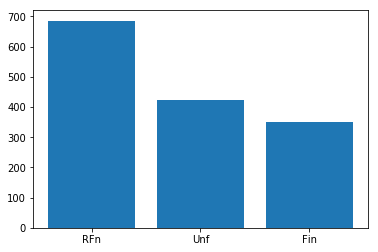

Histogram of : GarageCars


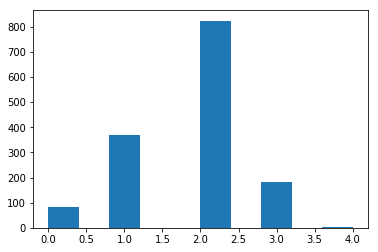

Histogram of : GarageArea


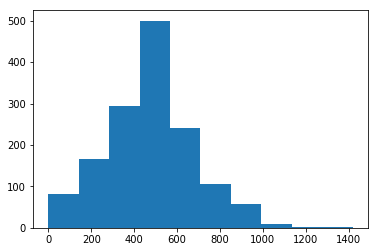

Bar graph of : GarageQual


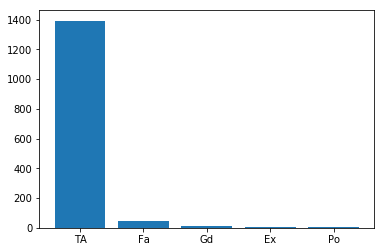

Bar graph of : GarageCond


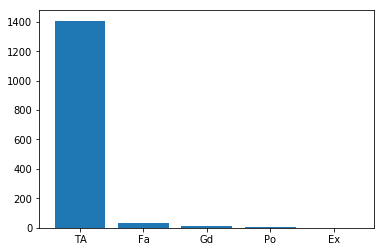

Bar graph of : PavedDrive


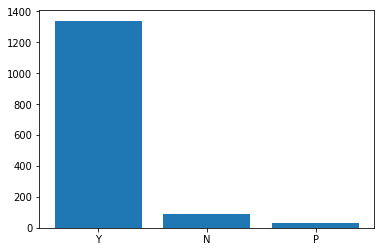

Histogram of : WoodDeckSF


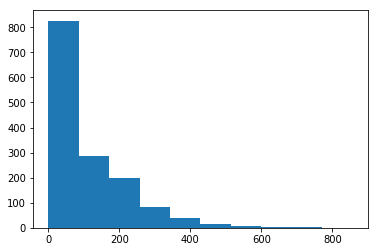

Histogram of : OpenPorchSF


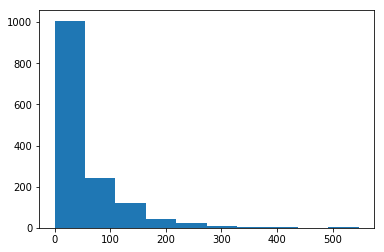

Histogram of : EnclosedPorch


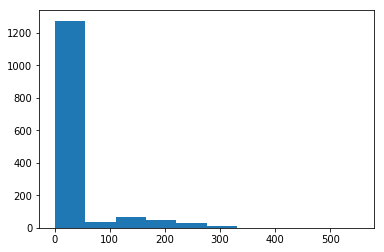

Histogram of : 3SsnPorch


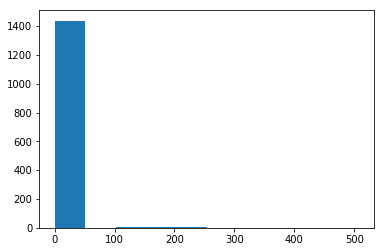

Histogram of : ScreenPorch


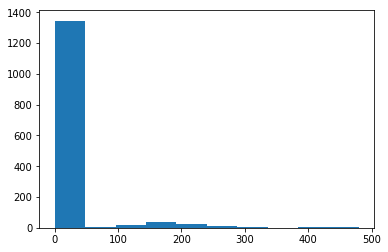

Histogram of : PoolArea


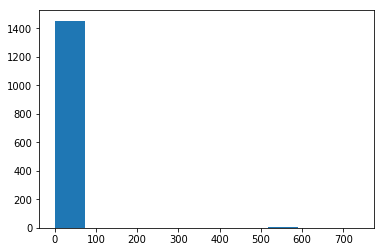

Histogram of : MiscVal


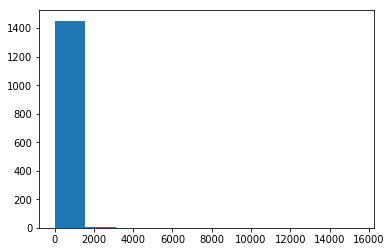

Histogram of : MoSold


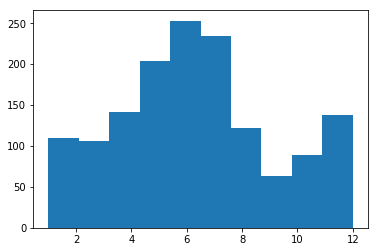

Histogram of : YrSold


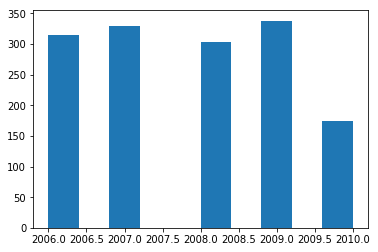

Bar graph of : SaleType


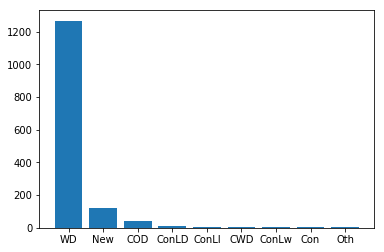

Bar graph of : SaleCondition


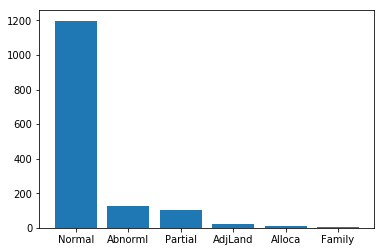

Histogram of : SalePrice


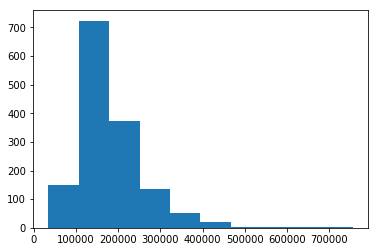

In [6]:
## Checking the distribution after imputing missing values:

def plot_vars_aft_impute(df):
    for i in df.columns[1:]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i])
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars_aft_impute(train)

In [7]:
## Removing variables with more than 10 categories to save from curse of dimensionality!

def more_than_10_cat(df,k):

    too_many_cats = []

    for i in df.columns:
        
        if (df[i].dtype != 'int64') and (df[i].dtype != 'float64'):
            
            if len(df[i].unique()) > k:
                
                too_many_cats.append(i)

    return too_many_cats

too_many_cats = more_than_10_cat(train,10)

<b>MODEL BUILDING</b>

In [8]:
y = train.SalePrice

In [9]:
def preprocessing_X(df):

    X = df[df.columns.difference(['SalePrice'])]
           
    X.drop(columns = too_many_cats, inplace=True)
           
    X_ = pd.get_dummies(X)
    
    from sklearn.preprocessing import StandardScaler

    STS = StandardScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X,X_

X,X_ = preprocessing_X(train)

C:\Users\Jatin\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=None,test_size=test_ratio)
      
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression().fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test
    
    

def metrics(X_train, X_test,y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import r2_score
    
    r_train = r2_score(y_tn, y_pred_tn)
    
    r_test = r2_score(y_ts, y_pred_ts)
    
    print('R squared on train data :',r_train)
    print('R squared on test data :',r_test)
    
    print('Training MSE :',sum((y_pred_tn - y_tn)**2/len(y_tn))**0.5)
    print('Test MSE :',sum((y_pred_ts - y_ts)**2/len(y_ts))**0.5)
    
    

LR,X_train, X_test, y_train, y_test = model_built(X_, y, 0.25)

y_pred_train = LR.predict(X_train)

y_pred_test = LR.predict(X_test)

metrics(X_train, X_test, y_train, y_pred_train,y_test,y_pred_test)

R squared on train data : 0.9283549733674854
R squared on test data : -4.421768204447424e+17
Training MSE : 20236.994863859196
Test MSE : 59599151792666.375


<b> WORST FIT EVER! </b>

In [11]:
## Handling multicollinearity:

def show_unimp_vars(df,max_corr, min_corr):
    
    not_so_imp_vars = []

    for i in X.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            if (abs(df[i].corr(df['SalePrice'])) < min_corr):
                not_so_imp_vars.append(i)

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return not_so_imp_vars, corr


unimp_vars, corr_list = show_unimp_vars(train,min_corr = 0.1, max_corr = 0.7)

In [12]:
print(unimp_vars)

corr_list

['3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'Id', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold', 'OverallCond', 'PoolArea', 'YrSold']


[('OverallQual', 'SalePrice'),
 ('YearBuilt', 'GarageYrBlt'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'SalePrice'),
 ('GarageCars', 'GarageArea')]

In [13]:
unimp_vars.extend(['GarageArea','GarageYrBlt','TotalBsmtSF'])
unimp_vars

['3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'Id',
 'LowQualFinSF',
 'MSSubClass',
 'MiscVal',
 'MoSold',
 'OverallCond',
 'PoolArea',
 'YrSold',
 '1stFlrSF',
 'GarageArea',
 'TotRmsAbvGrd',
 'GarageYrBlt']

In [14]:
X2_ = X.drop(columns=unimp_vars)

In [15]:
X2_ = pd.get_dummies(X_)
X2_.shape

(1460, 215)

In [16]:
from sklearn.preprocessing import StandardScaler

STS = StandardScaler()

X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])

LR2,X2_train, X2_test, y2_train, y2_test = model_built(X_,y,0.25)

In [17]:
y2_pred_test = LR2.predict(X2_test)
# r2_test2 = r2()

y2_pred_train = LR2.predict(X2_train)

metrics(X2_train, X2_test, y2_train, y2_pred_train, y2_test, y2_pred_test)

R squared on train data : 0.9309032104505257
R squared on test data : -1.238700530270392e+19
Training MSE : 21260.374085399864
Test MSE : 263430548383333.53


<b>It has overfitted miserably!</b>
<br>
<b>We'll work on LASSO now as it will help in feature selection as well.</b>

In [18]:
def Lasso(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split
    
    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=None,test_size=test_ratio)
      
    from sklearn.linear_model import Lasso

    ls = Lasso(alpha=10, max_iter=10000).fit(X_train, y_train)
    
    return ls,X_train,X_test,y_train,y_test

LS,X3_train, X3_test, y3_train, y3_test = Lasso(X2_,train['SalePrice'],0.25)

In [19]:
y_ls_pred_test = LS.predict(X3_test)
y_ls_pred_train = LS.predict(X3_train)

metrics(X3_train, X3_test, y3_train, y_ls_pred_train, y3_test, y_ls_pred_test)

R squared on train data : 0.9131589297617783
R squared on test data : 0.900424420988803
Training MSE : 24056.825032425168
Test MSE : 22718.59449703805


<b>Amazing change in the results as LASSO has turned the coefficients of all the unimportant variables to zero and hence, the curse of dimensionality has been lifted! <b>

SVM can work in high dimensions and with less data as its objective involves only fitting points around the margin!

In [20]:
def SVR(X1,y1,test_ratio):
    
    from sklearn.model_selection import train_test_split
    
    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=None,test_size=test_ratio)    

    from sklearn.svm import SVR

    SV_reg = SVR(kernel='linear', epsilon = 0.01, C = 1000, gamma = 0.0005).fit(X_train, y_train)
    
    return SV_reg, X_train, X_test, y_train, y_test

SV_r, X4_train, X4_test, y4_train, y4_test = SVR(X2_,train['SalePrice'],0.25)

In [21]:
y_svr_pred_test = SV_r.predict(X4_test)
y_svr_pred_train = SV_r.predict(X4_train)

metrics(X4_train, X4_test, y4_train, y_svr_pred_train, y4_test, y_svr_pred_test)

R squared on train data : 0.8273701838854565
R squared on test data : 0.8815800574237225
Training MSE : 33121.69211538259
Test MSE : 27009.244659279426


Grid searching parameters:

<b>It performs equally well compared to LASSO!</b>